In [10]:
import requests
import time 

In [11]:
 from owslib.wcs import WebCoverageService

wcs = WebCoverageService('https://maps.isric.org/mapserv?map=/map/nitrogen.map',
                         version='2.0.1')

In [12]:
print(wcs.contents.keys()) 

dict_keys(['nitrogen_0-5cm_Q0.05', 'nitrogen_0-5cm_Q0.5', 'nitrogen_0-5cm_Q0.95', 'nitrogen_0-5cm_mean', 'nitrogen_0-5cm_uncertainty', 'nitrogen_5-15cm_Q0.5', 'nitrogen_5-15cm_Q0.05', 'nitrogen_5-15cm_Q0.95', 'nitrogen_5-15cm_mean', 'nitrogen_5-15cm_uncertainty', 'nitrogen_15-30cm_Q0.05', 'nitrogen_15-30cm_Q0.5', 'nitrogen_15-30cm_Q0.95', 'nitrogen_15-30cm_mean', 'nitrogen_15-30cm_uncertainty', 'nitrogen_30-60cm_Q0.05', 'nitrogen_30-60cm_Q0.5', 'nitrogen_30-60cm_Q0.95', 'nitrogen_30-60cm_mean', 'nitrogen_30-60cm_uncertainty', 'nitrogen_60-100cm_Q0.05', 'nitrogen_60-100cm_Q0.5', 'nitrogen_60-100cm_Q0.95', 'nitrogen_60-100cm_mean', 'nitrogen_60-100cm_uncertainty', 'nitrogen_100-200cm_Q0.05', 'nitrogen_100-200cm_Q0.5', 'nitrogen_100-200cm_Q0.95', 'nitrogen_100-200cm_mean', 'nitrogen_100-200cm_uncertainty'])


In [13]:
 cov_id = 'nitrogen_0-5cm_mean'
ph_0_5 = wcs.contents[cov_id]
ph_0_5.supportedFormats

['image/tiff',
 'image/png',
 'image/jpeg',
 'image/png; mode=8bit',
 'image/vnd.jpeg-png',
 'image/vnd.jpeg-png8']

subsets = [('X',  -2784000, 800000), ('Y', 156000, 3863000)] Гвинейский залив

subsets = [('X',  -584000, 3000000), ('Y', 156000, 3863000)] Сахара

subsets = [('X', -800000, 3000000), ('Y', 4000000, 7700000)] Европа

subsets = [('X', 1000000, 5000000), ('Y', 4000000, 7700000)]  Чуть ближе к россии 

subsets = [('X', 3000000, 7000000), ('Y', 4000000, 7700000)] Россия!

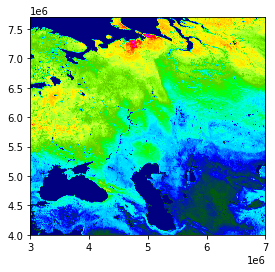

In [14]:
try:
#     subsets = [('X', -1784000, -1140000), ('Y', 1356000, 1863000)] #original
    subsets = [('X', 3000000, 7000000), ('Y', 4000000, 7700000)] 

    crs = "http://www.opengis.net/def/crs/EPSG/0/152160"
    # crs = "http://www.opengis.net/def/crs/EPSG/0/4326"

    response = wcs.getCoverage(
        identifier=[cov_id], 
        crs=crs,
        subsets=subsets, 
        resx=250, resy=250, 
        format=ph_0_5.supportedFormats[0])

    with open('C:/Users/gorba/DataSciense/PET-projects/SoilGrid/nitrogen.tif', 'wb') as file:
        file.write(response.read())

    import rasterio
    from rasterio import plot

    ph = rasterio.open('C:/Users/gorba/DataSciense/PET-projects/SoilGrid/nitrogen.tif', driver="GTiff")
    %matplotlib inline
    plot.show(ph, cmap='gist_ncar')
except requests.exceptions.ReadTimeout:
        print("\n Переподключение к серверам\n")
        time.sleep(30)